In [2]:
import geopandas as gpd
from highcharts_maps.chart import Chart
from highcharts_maps.options.series.map import MapSeries
import folium
import matplotlib.pyplot as plt
import pandas as pd
import contextily as cx


In [3]:
df_67 = gpd.read_file("data/67/D67_RPG2022_niv1.shp", engine="pyogrio")
df_68 = gpd.read_file("data/68/D68_RPG2022_niv1.shp", engine="pyogrio")
df = gpd.GeoDataFrame(pd.concat([df_67, df_68]))

In [4]:
df

NUM_ILOT  NUM_PARCEL CODE_CULTU  SURF_ADM  BIO  MARAICHAGE AGROFOREST  \
0            11           1        PPH     15.63    1           0       None   
1            11           1        PPH      0.97    0           0       None   
2            16          56        BTH      1.90    0           0       None   
3            36           1        PTR      1.04    1           0       None   
4            54           1        BTH      1.72    0           0       None   
...         ...         ...        ...       ...  ...         ...        ...   
91313        23           1        BTH      1.02    0           0       None   
91314        70           1        BTH      1.50    0           0       None   
91315         8           2        J6S      2.95    0           0       None   
91316         4           1        J5M      0.02    1           0       None   
91317         5           2        SOJ      2.23    0           0       None   

                                                geometry  
0      POLYGON ((1004321.807 6813947.237, 1004316.122...  
1      POLYGON ((1004311.338 6822217.053, 1004348.380...  
2      POLYGON ((1004227.240 6869838.308, 1004225.674...  
3      POLYGON ((1004290.477 6870646.137, 1004134.265...  
4      POLYGON ((1004427.790 6870806.379, 1004341.201...  
...                                                  ...  
91313  POLYGON ((1041143.761 6727807.937, 1041141.977...  
91314  POLYGON ((1041334.032 6727821.796, 1041303.340...  
91315  POLYGON ((1041393.591 6764289.536, 1041346.244...  
91316  POLYGON ((1043019.476 6733696.205, 1043012.142...  
91317  POLYGON ((1043352.814 6775842.126, 1043446.396...  

[246540 rows x 8 columns]

In [5]:
ref_culture = pd.read_csv("data/REF_CULTURES_GROUPES_CULTURES_2021.csv", sep=';')
ref_culture

CODE_CULTURE                                    LIBELLE_CULTURE  \
0            BTH                                 Blé tendre d’hiver   
1            BTP                            Blé tendre de printemps   
2            MID                                          Maïs doux   
3            MIE                                      Maïs ensilage   
4            MIS                                               Maïs   
..           ...                                                ...   
347          TRU           Truffière (chênaie de plants mycorhizés)   
348          VET                                            Vétiver   
349          ZZZ                                   Culture inconnue   
350          MLS  Mélange de légumineuses non fourragères prépon...   
351          ACP                              Autre culture pérenne   

     CODE_GROUPE_CULTURE  LIBELLE_GROUPE_CULTURE  
0                      1              Blé tendre  
1                      1              Blé tendre  
2                      2  Maïs grain et ensilage  
3                      2  Maïs grain et ensilage  
4                      2  Maïs grain et ensilage  
..                   ...                     ...  
347                   28                  Divers  
348                   28                  Divers  
349                   28                  Divers  
350                    8            Protéagineux  
351                   28                  Divers  

[352 rows x 4 columns]

In [6]:

df = df.set_index("CODE_CULTU").join(ref_culture.set_index("CODE_CULTURE"))

In [7]:
df["LIBELLE_GROUPE_CULTURE"].isna().sum()

0

In [8]:
df_sorted = df[["SURF_ADM", "LIBELLE_GROUPE_CULTURE"]].groupby(["LIBELLE_GROUPE_CULTURE"]).sum().sort_values("SURF_ADM", ascending=False)

df_sorted

SURF_ADM
LIBELLE_GROUPE_CULTURE                          
Maïs grain et ensilage                 125105.34
Prairies permanentes                    70238.46
Blé tendre                              48044.67
Fourrage                                 7396.90
Prairies temporaires                     7341.06
Colza                                    7333.38
Autres oléagineux                        7152.48
Vignes                                   6206.55
Autres cultures industrielles            5844.02
Gel (surfaces gelées sans production)    5724.41
Orge                                     5668.75
Autres céréales                          5229.03
Estives et landes                        4541.43
Légumes ou fleurs                        3925.74
Tournesol                                2449.60
Vergers                                  1315.62
Protéagineux                              442.18
Divers                                    399.78
Légumineuses à grains                      74.95
Plantes à fibres                           63.32
Fruits à coque                             31.84

<Axes: ylabel='SURF_ADM'>

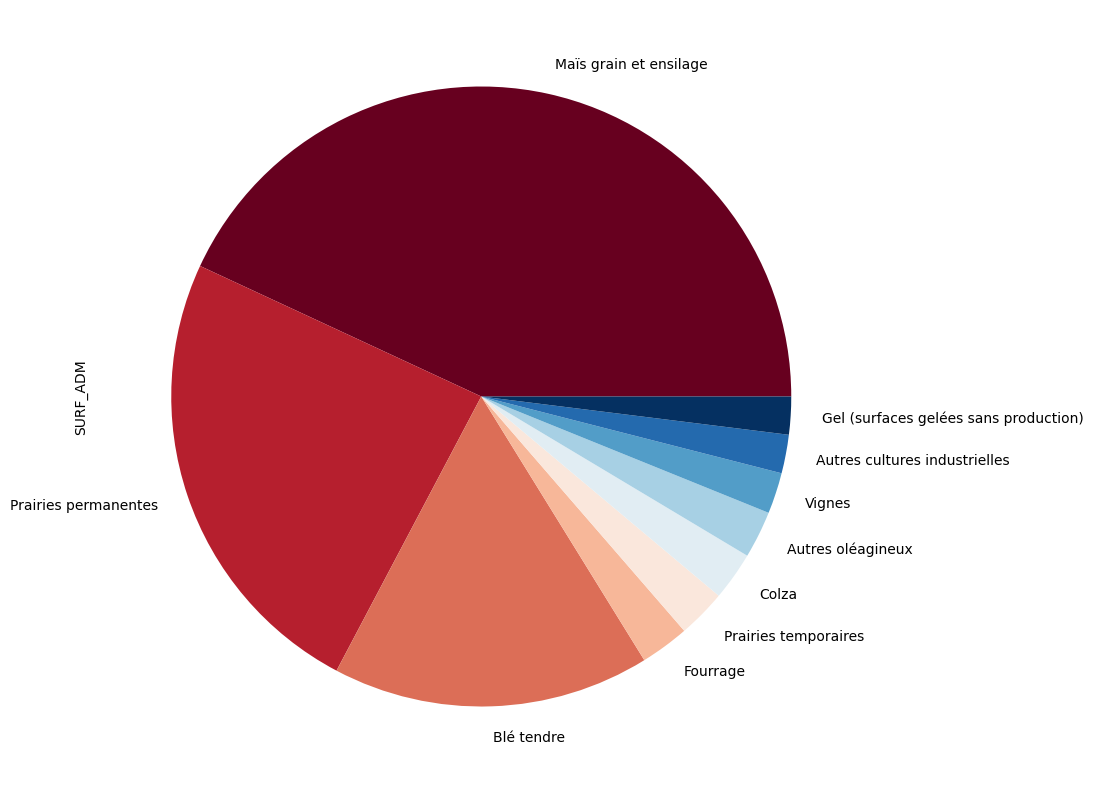

In [9]:
df_sorted.nlargest(10, "SURF_ADM").plot(figsize=(10, 20), kind="pie", x=df_sorted.index, y="SURF_ADM", legend=False, cmap='RdBu')

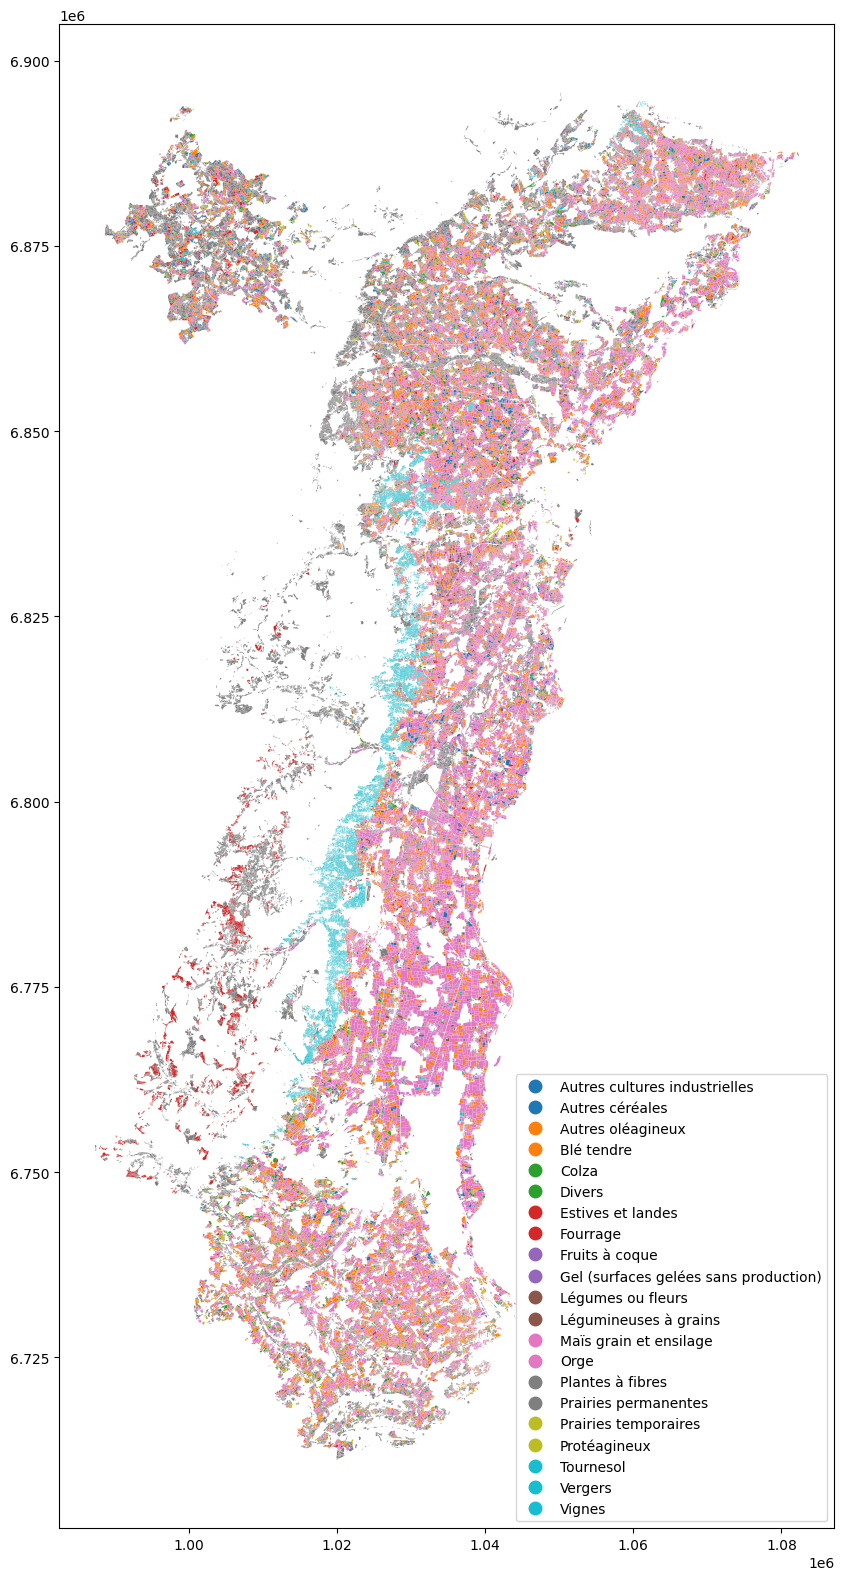

In [10]:
df.plot(figsize=(10, 20), column="LIBELLE_GROUPE_CULTURE", legend=True,  legend_kwds={'loc': 'lower right'})
plt.show()

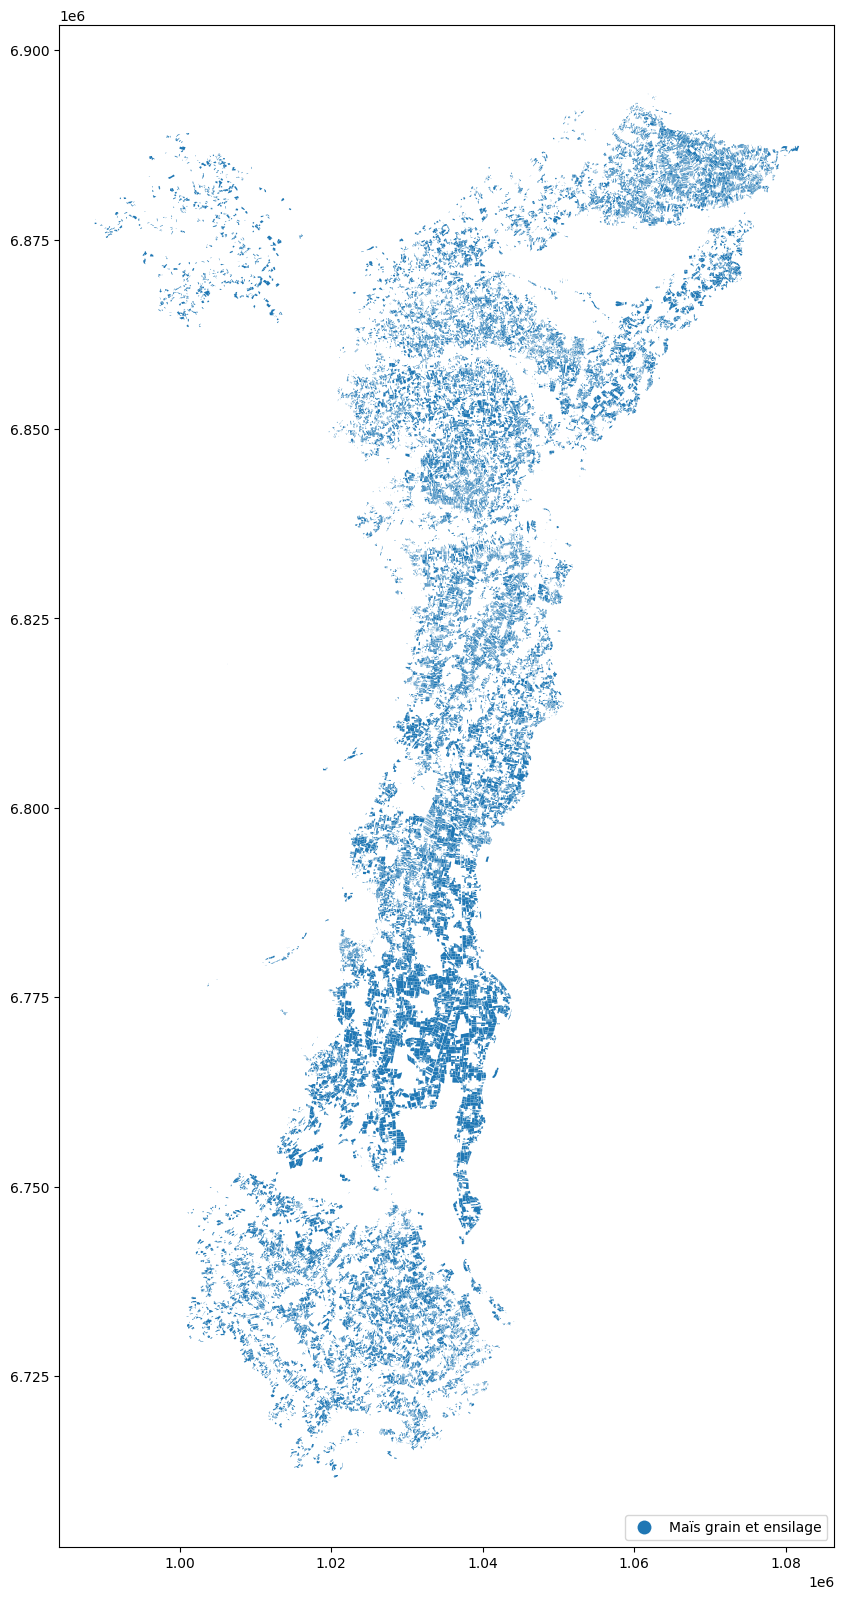

In [11]:
df[df["LIBELLE_GROUPE_CULTURE"]=="Maïs grain et ensilage"].plot(figsize=(10, 20), column="LIBELLE_GROUPE_CULTURE", legend=True,  legend_kwds={'loc': 'lower right'})
plt.show()

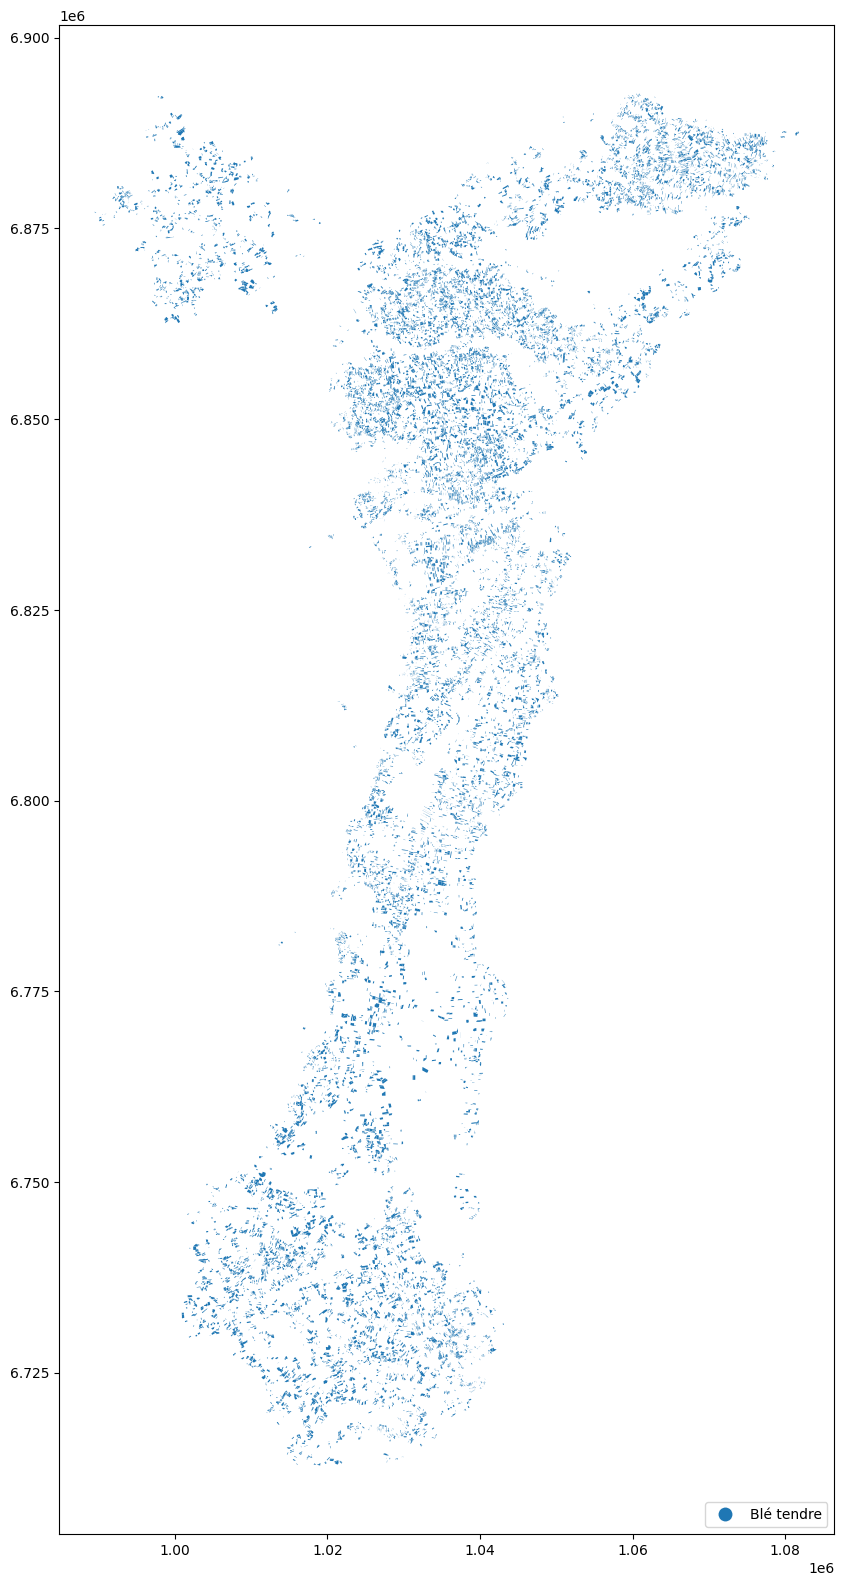

In [12]:
df[df["LIBELLE_GROUPE_CULTURE"]=="Blé tendre"].plot(figsize=(10, 20), column="LIBELLE_GROUPE_CULTURE", legend=True,  legend_kwds={'loc': 'lower right'})
plt.show()

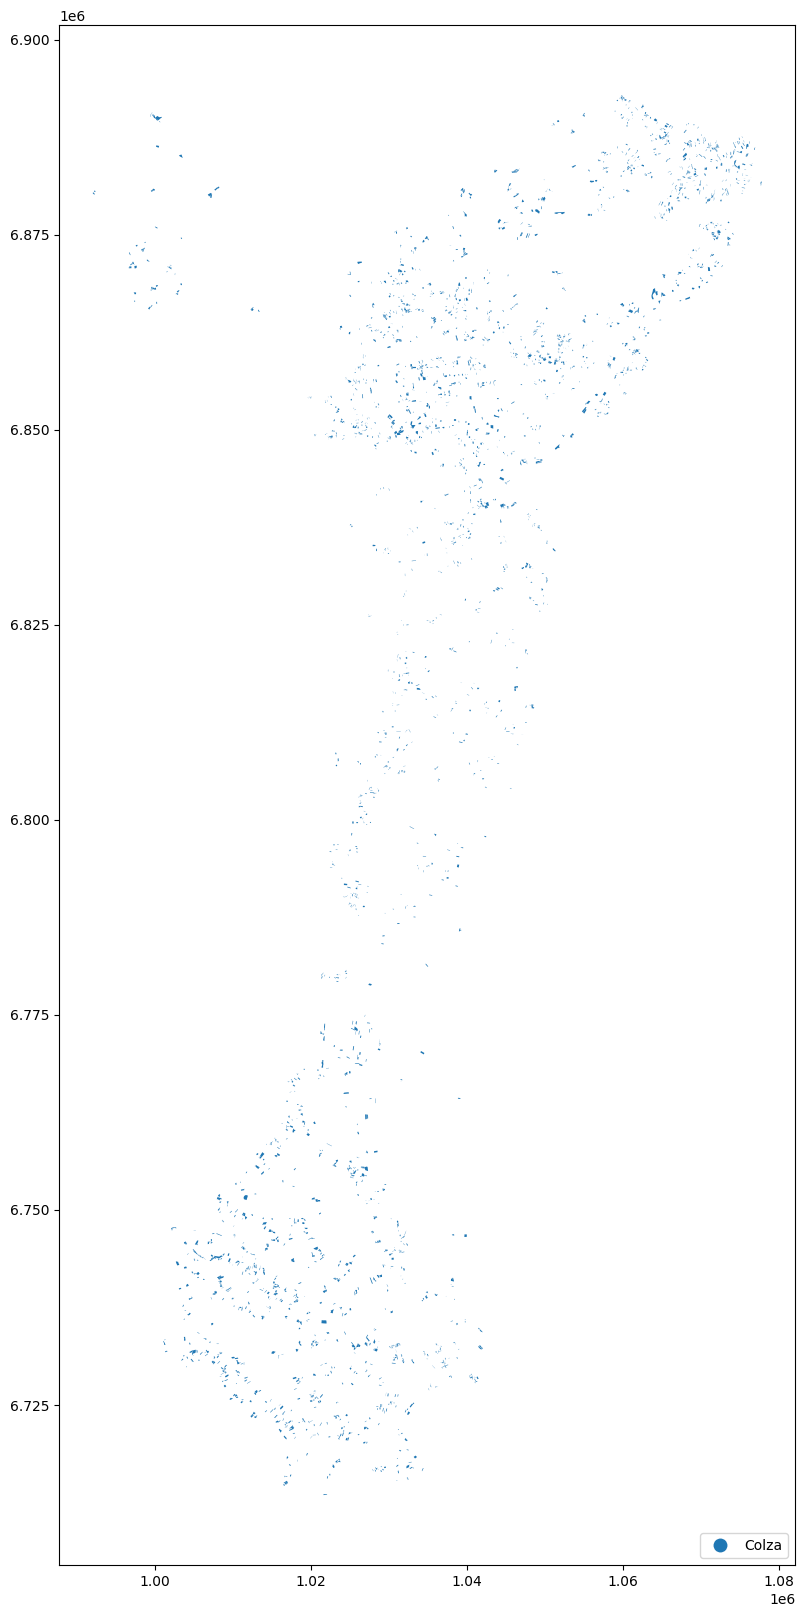

In [14]:
df[df["LIBELLE_GROUPE_CULTURE"]=="Colza"].plot(figsize=(10, 20), column="LIBELLE_GROUPE_CULTURE", legend=True,  legend_kwds={'loc': 'lower right'})
plt.show()

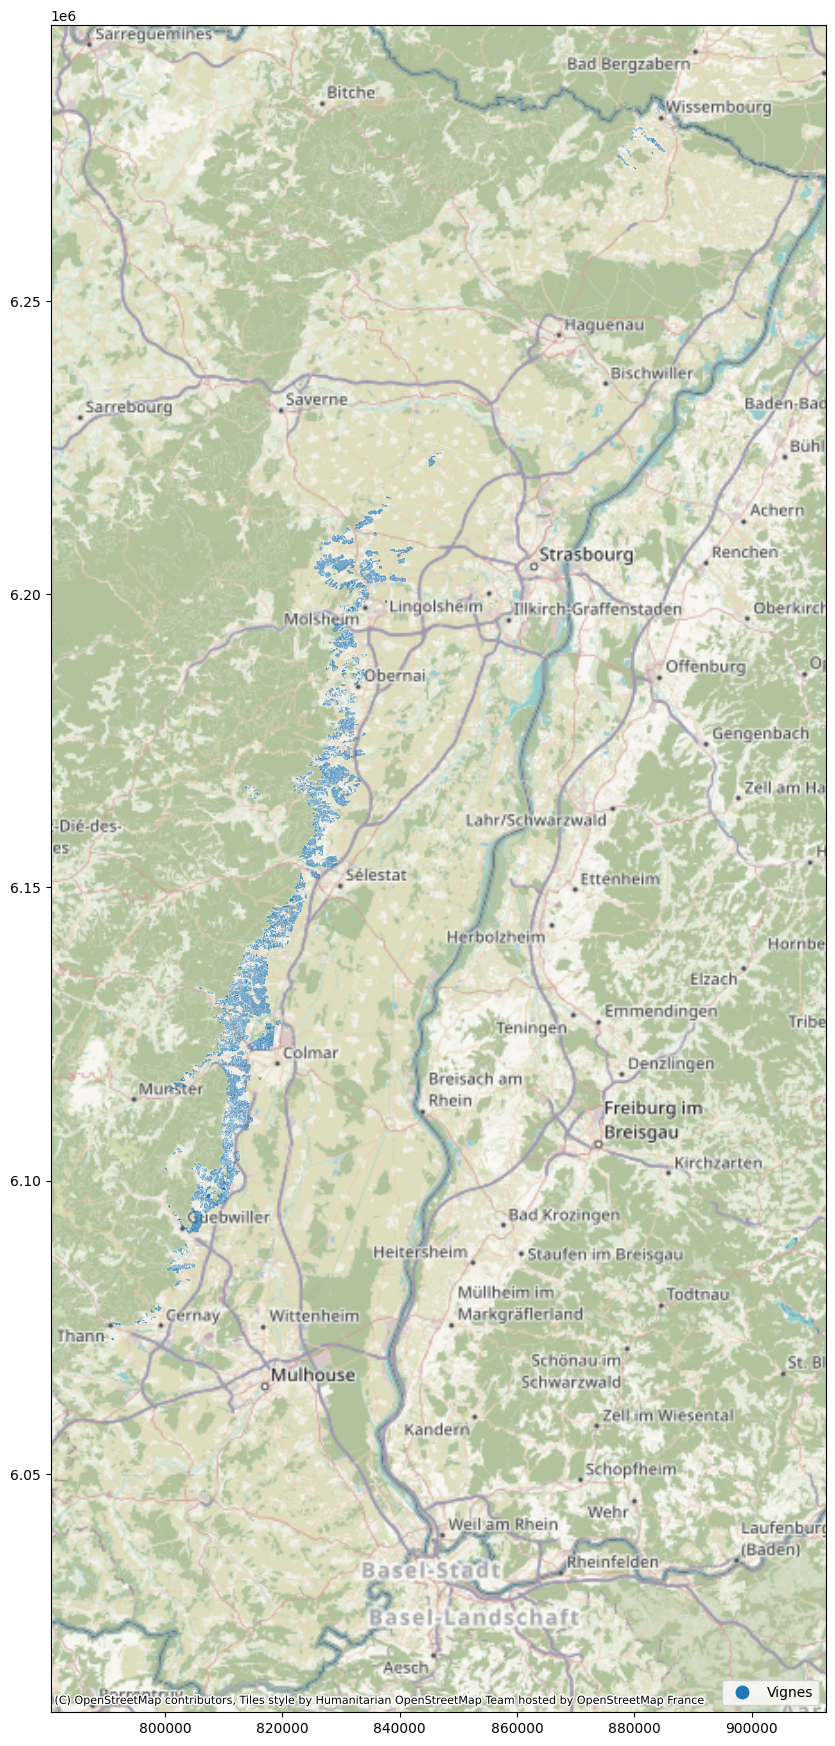

In [16]:
vignes = df[df["LIBELLE_GROUPE_CULTURE"]=="Vignes"]
ax = vignes.to_crs(epsg=3857).plot(figsize=(10, 30), column="LIBELLE_GROUPE_CULTURE", legend=True,  legend_kwds={'loc': 'lower right'})
cx.add_basemap(ax)

In [16]:
for _, r in vignes.head(100000).to_crs(epsg=4326).iterrows():
    # Without simplifying the representation of each borough,
    # the map might not be displayed
    sim_geo = gpd.GeoSeries(r["geometry"]).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {"fillColor": "orange"})
    folium.Popup(r["LIBELLE_GROUPE_CULTURE"]).add_to(geo_j)
    geo_j.add_to(map)
map

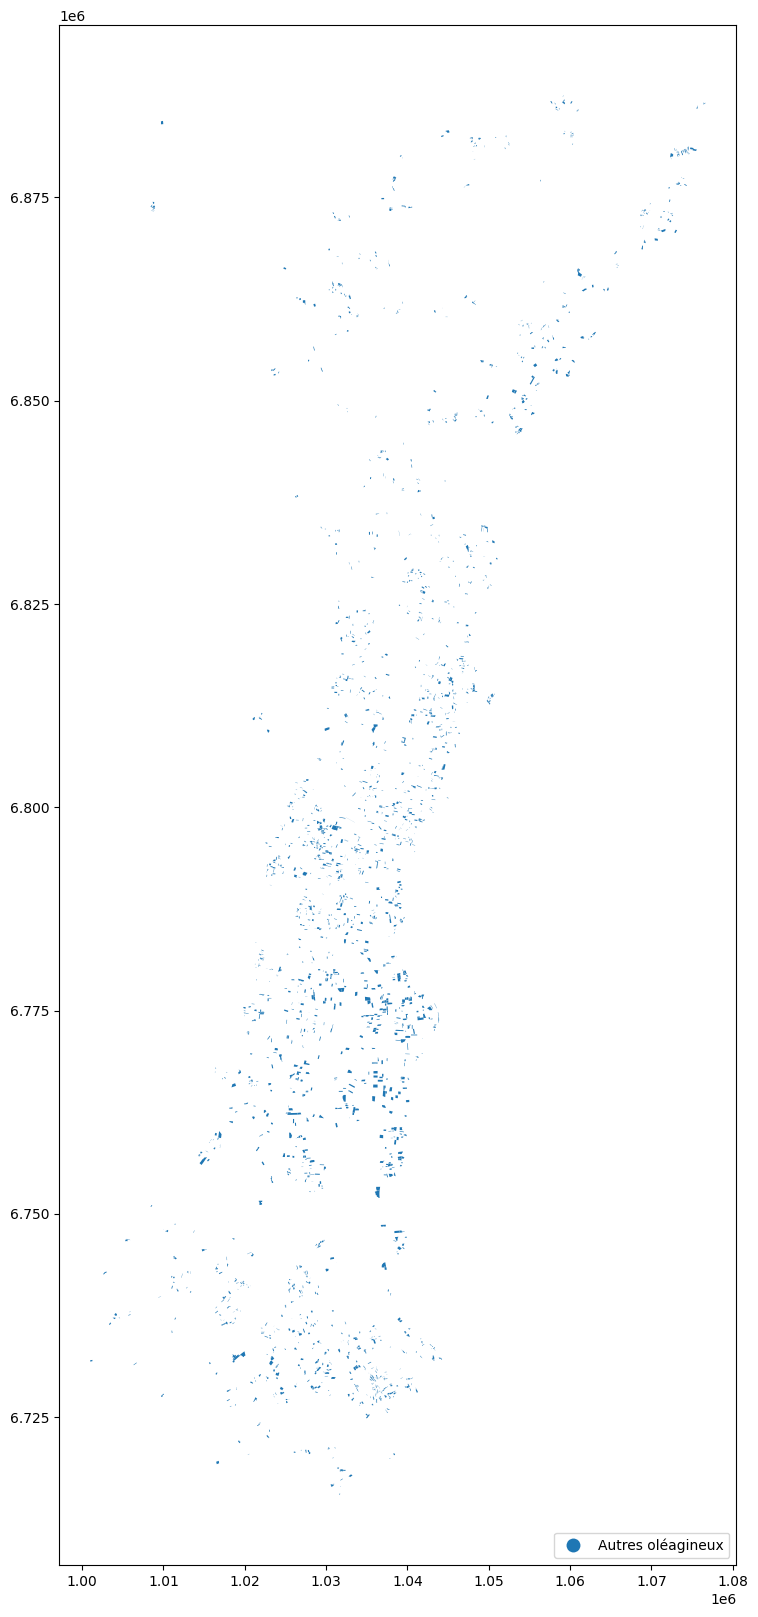

In [148]:
df[df["LIBELLE_GROUPE_CULTURE"]=="Autres oléagineux"].plot(figsize=(10, 20), column="LIBELLE_GROUPE_CULTURE", legend=True,  legend_kwds={'loc': 'lower right'})
plt.show()
#Autres oléagineux

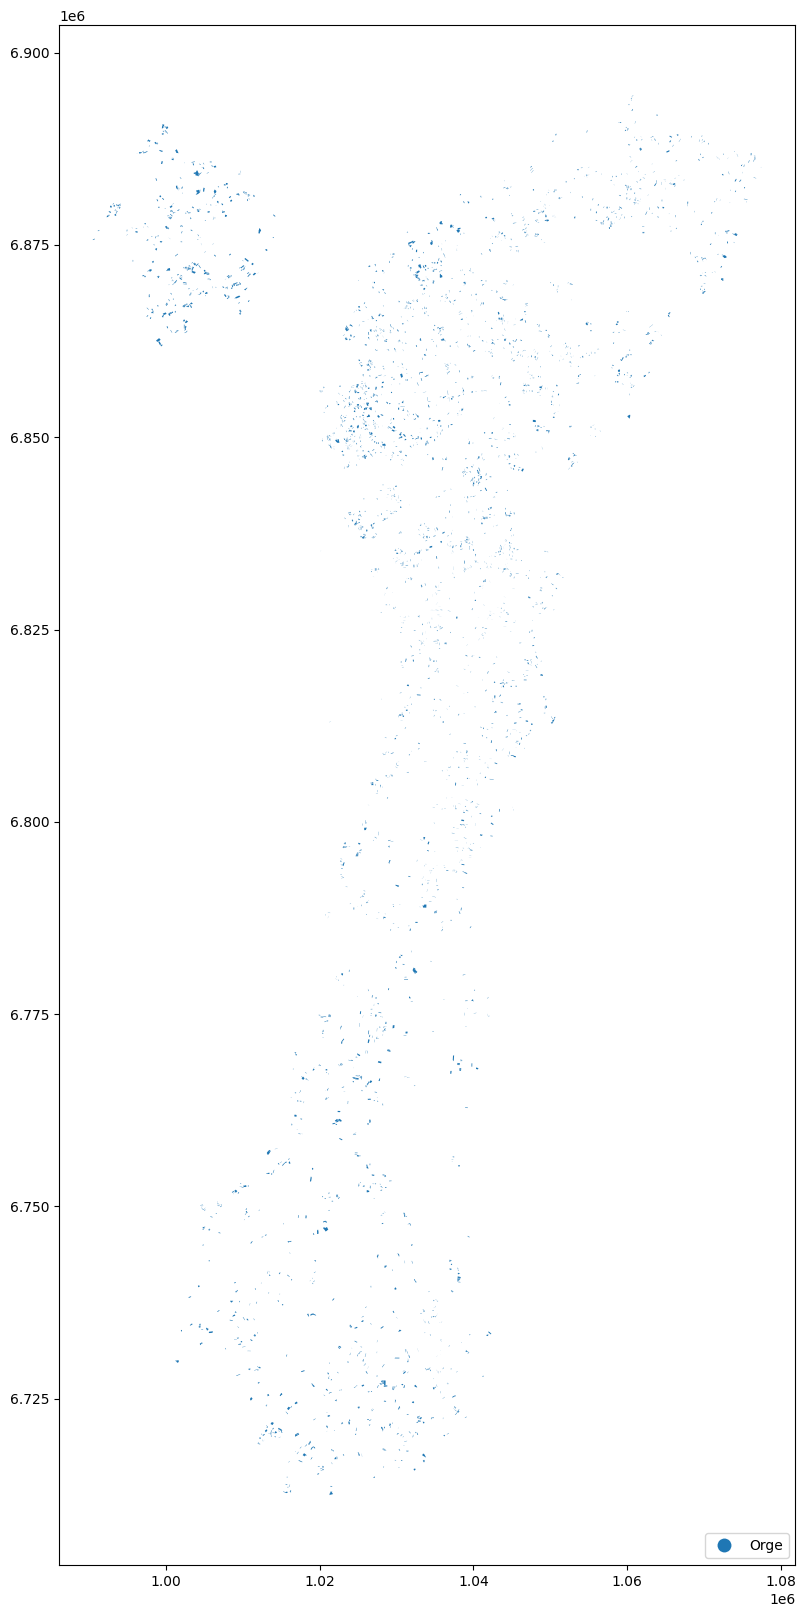

In [149]:
df[df["LIBELLE_GROUPE_CULTURE"]=="Orge"].plot(figsize=(10, 20), column="LIBELLE_GROUPE_CULTURE", legend=True,  legend_kwds={'loc': 'lower right'})
plt.show()

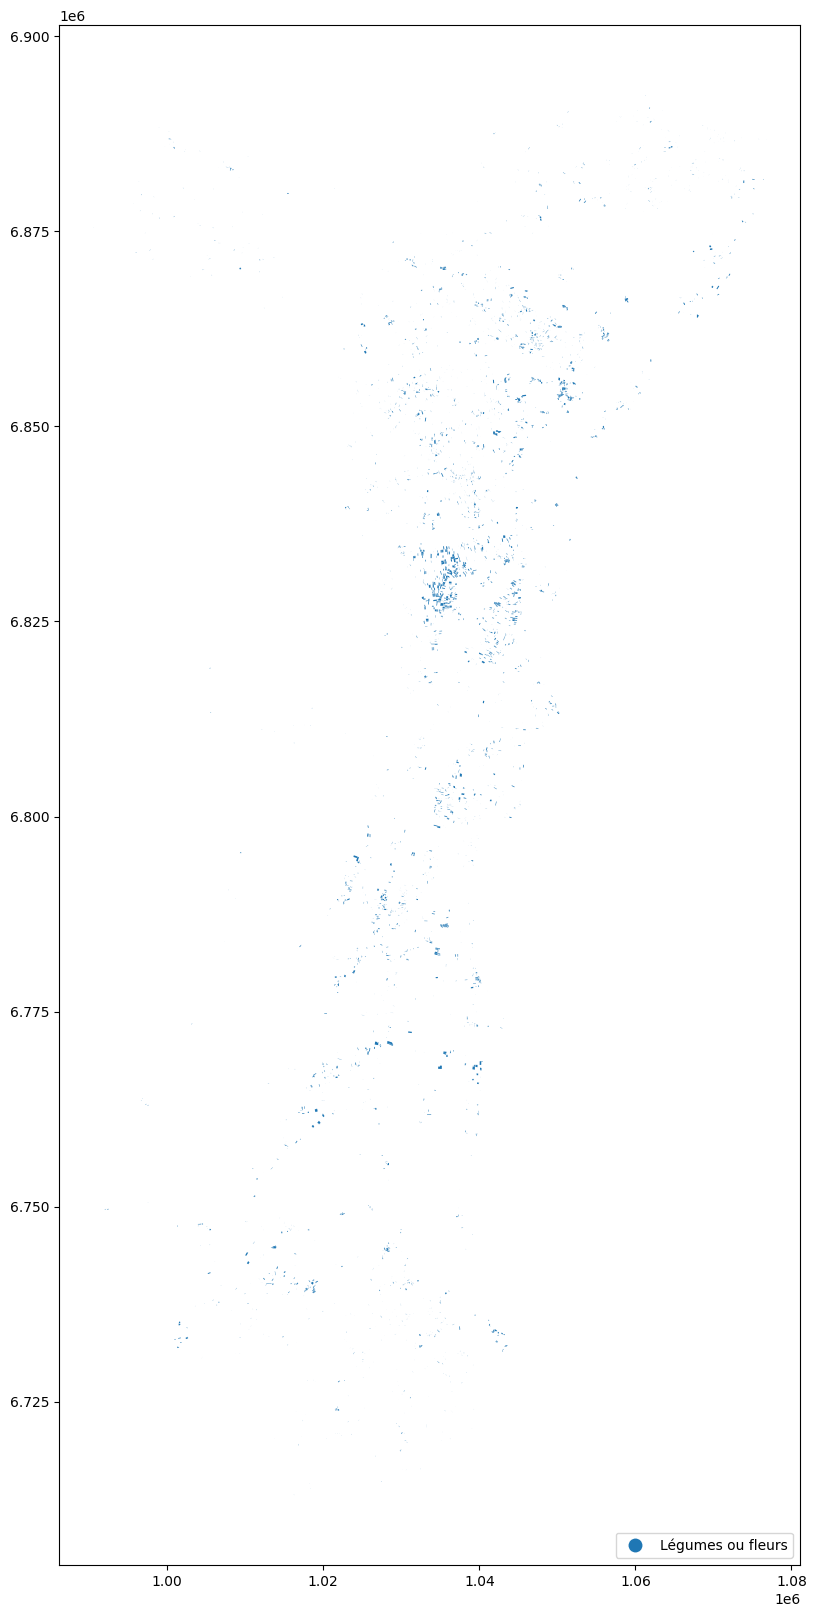

In [150]:
df[df["LIBELLE_GROUPE_CULTURE"]=="Légumes ou fleurs"].plot(figsize=(10, 20), column="LIBELLE_GROUPE_CULTURE", legend=True,  legend_kwds={'loc': 'lower right'})
plt.show()


# Cultures étudiées

* Maïs grain et ensilage
* Blé tendre
* Colza
* Vignes
* Autres oléagineux
* Orge
* Légumes ou fleurs

